# Spectral Plots

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import re

import sklearn
import pandas as pd

## VIS-NIR

In [3]:
# Read spectras from different imaging days
day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day2.csv")
day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day5.csv")
day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day7.csv")
day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day9.csv")


In [4]:
day2.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day5.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day7.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day9.drop(columns=["Unnamed: 0", "image_id"], inplace=True)


In [5]:
day2["class"] = day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day5["class"] = day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day7["class"] = day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9["class"] = day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})


In [6]:
day2_mean = day2.groupby("class").mean()
day5_mean = day5.groupby("class").mean()
day7_mean = day7.groupby("class").mean()
day9_mean = day9.groupby("class").mean()

day2_std = day2.groupby("class").std()
day5_std = day5.groupby("class").std()
day7_std = day7.groupby("class").std()
day9_std = day9.groupby("class").std()

In [7]:
# Get the wavelengths as a list of floats for plotting
wavelengths = []
for col in day2_mean.columns:
    match = re.match(r"(\d+)", col)
    if match:  # column starts with numbers (e.g. 420nm)
        wavelengths.append(float(match.group(1)))

In [8]:
def plot_mean_std(mean_df, std_df, day=None, cam=None):
  # Example: assuming mean_df and std_df have the same columns
  #wavelengths = wavelengths

  plt.figure(figsize=(10, 6))

  for group in mean_df.index:
      mean_vals = mean_df.loc[group].values
      std_vals = std_df.loc[group].values

      # Mean line
      plt.plot(wavelengths, mean_vals, label=f"{group}")

      # ± std translucent band
      plt.fill_between(
          wavelengths,
          mean_vals - std_vals,
          mean_vals + std_vals,
          alpha=0.2
      )

  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.ylabel("Reflectance", fontsize=20)
  plt.title(f"Mean Spectrum with ± Standard Deviation - Day {day}", fontsize=24)
  plt.legend(fontsize=14)
  plt.tight_layout()
  #plt.savefig(f"/content/drive/MyDrive/Master/data/plots/{cam}_day{day}_std.png", dpi=400)
  plt.show()



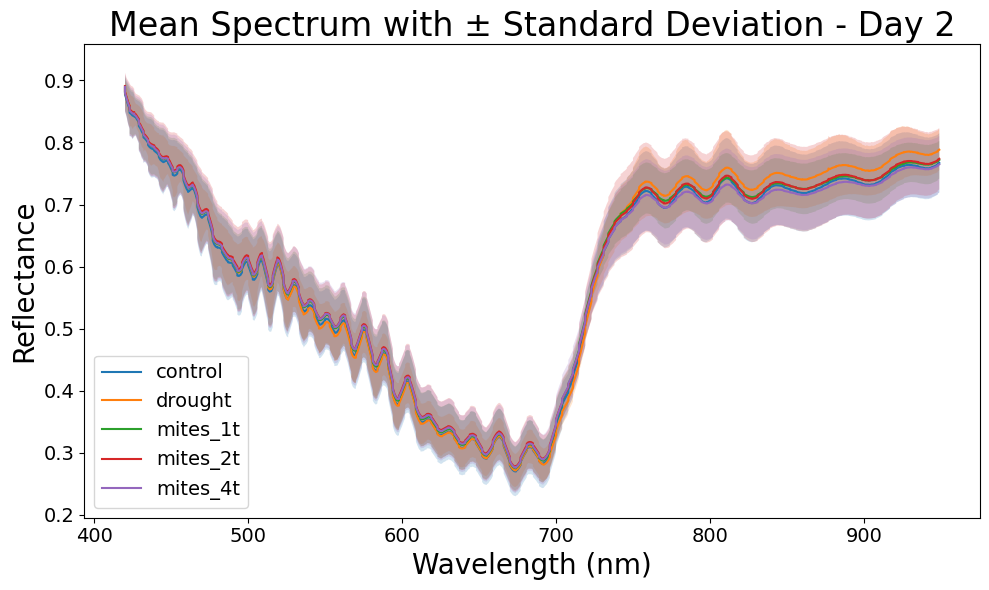

In [9]:
plot_mean_std(day2_mean, day2_std, day=2, cam="visnir")

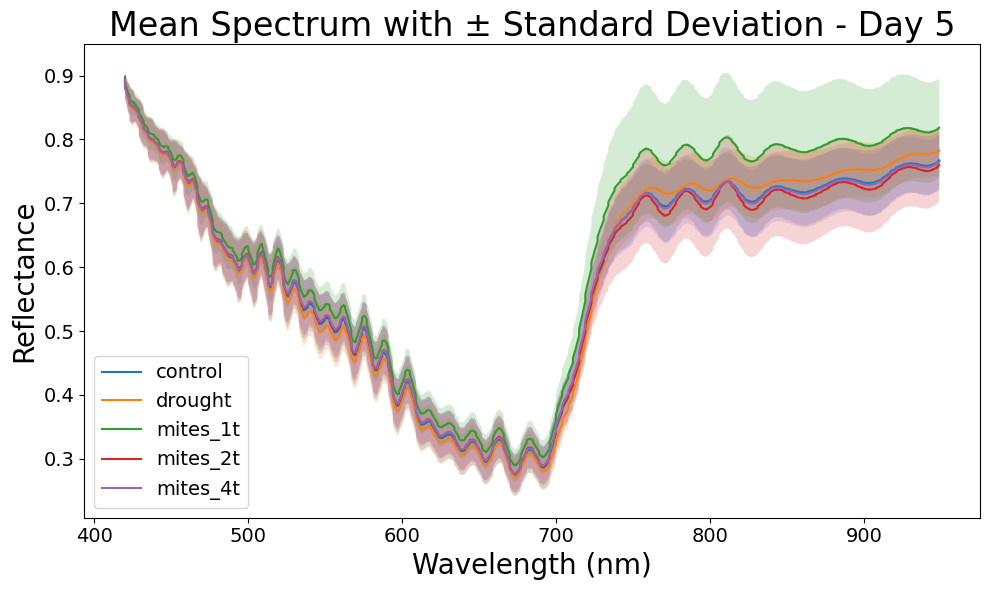

In [10]:
plot_mean_std(day5_mean, day5_std, day=5, cam="visnir")

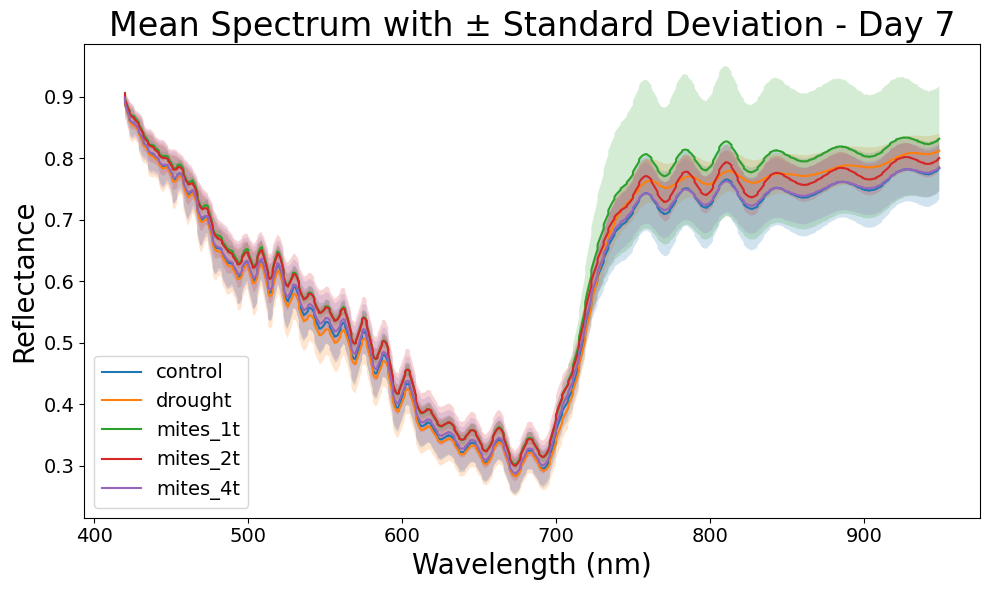

In [11]:
plot_mean_std(day7_mean, day7_std, day=7, cam="visnir")

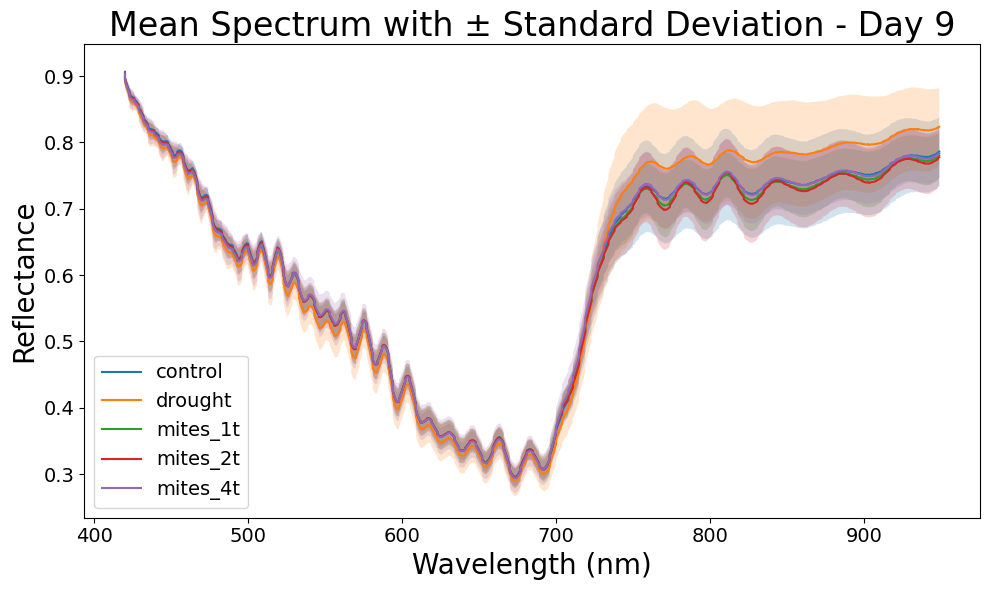

In [12]:
plot_mean_std(day9_mean, day9_std, day=9, cam="visnir")

In [13]:
day2_mean.reset_index(inplace=True)
day5_mean.reset_index(inplace=True)
day7_mean.reset_index(inplace=True)
day9_mean.reset_index(inplace=True)


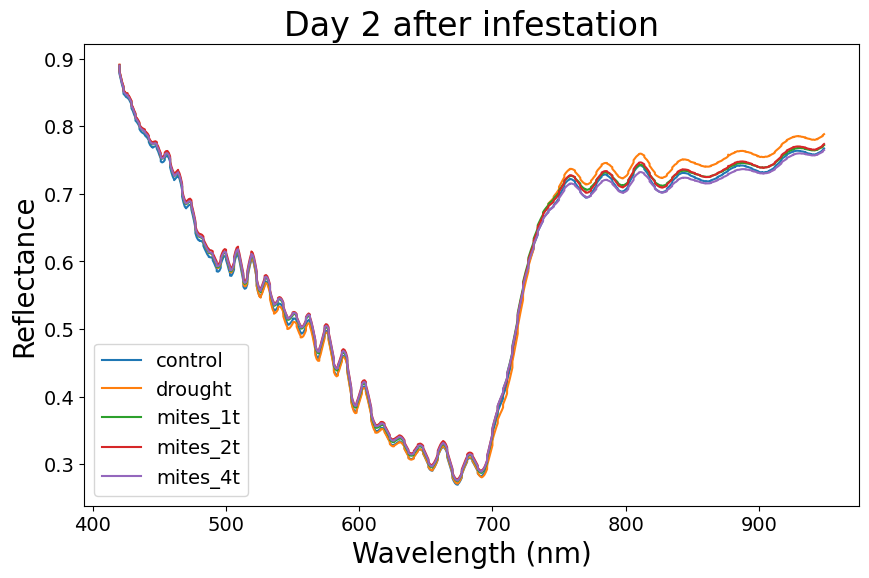

In [14]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day2_mean.columns if col not in ["class"]]
for ix, row in enumerate(day2_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day2_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 2 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

#plt.savefig("/content/drive/MyDrive/Master/data/plots/visnir_day2_smooth.png", dpi=400)

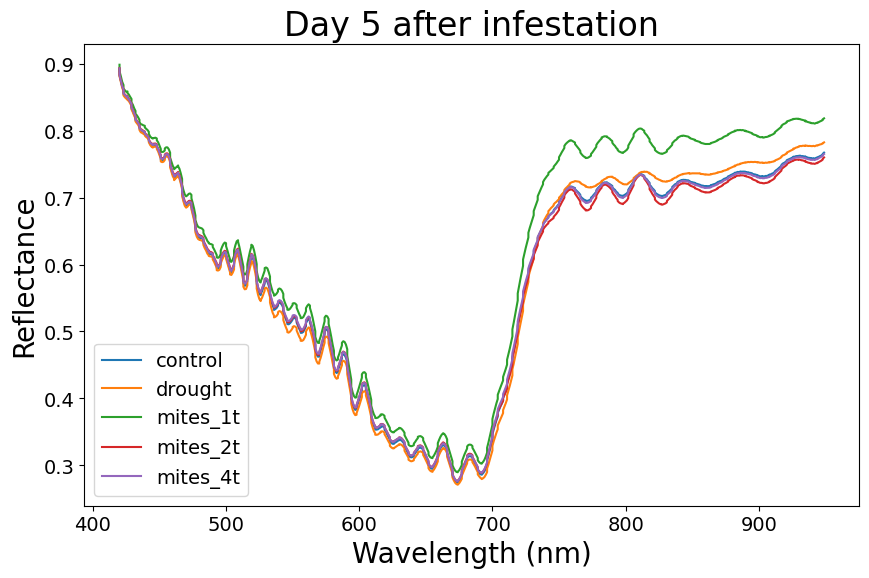

In [15]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day5_mean.columns if col not in ["class"]]
for ix, row in enumerate(day5_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day5_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 5 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/visnir_day5_smooth.png", dpi=400)

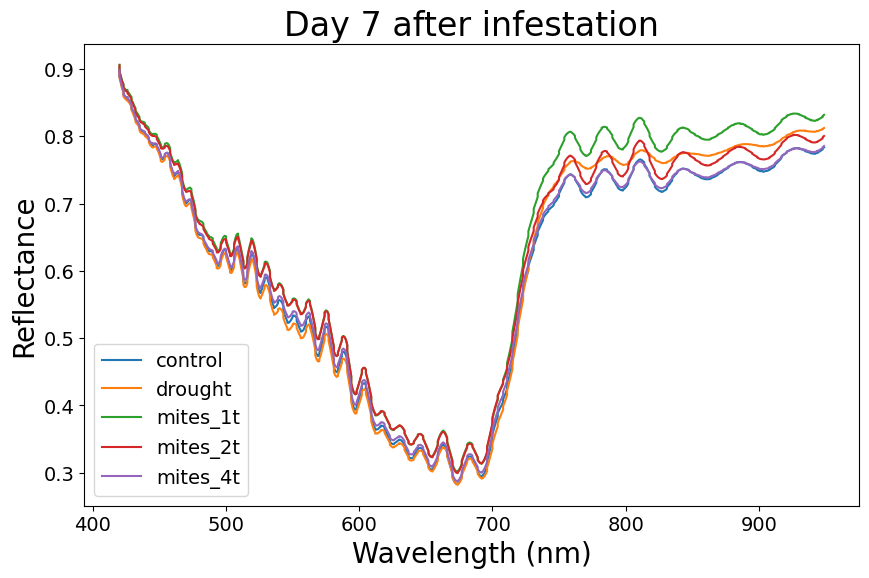

In [16]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day7_mean.columns if col not in ["class"]]
for ix, row in enumerate(day7_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day7_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 7 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/visnir_day7_smooth.png", dpi=400)

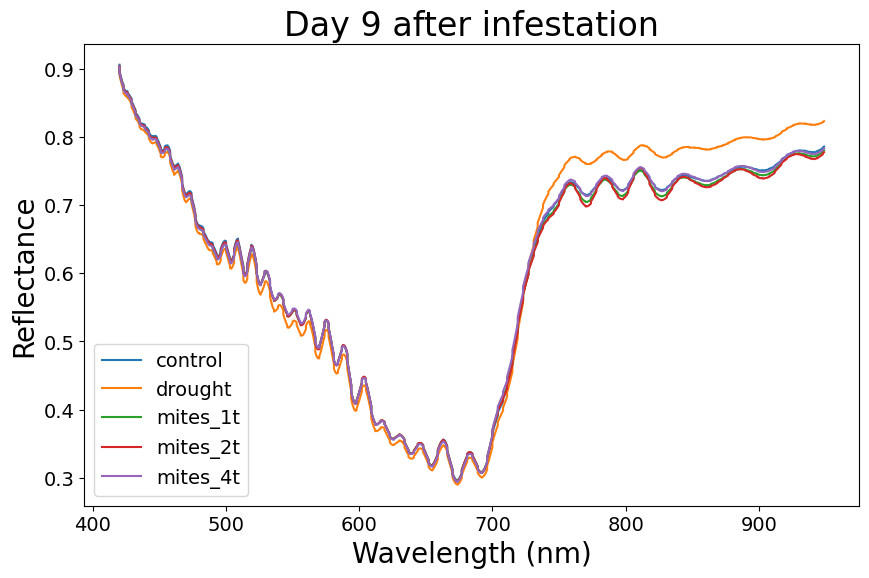

In [17]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day9_mean.columns if col not in ["class"]]
for ix, row in enumerate(day9_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day9_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 9 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/visnir_day9_smooth.png", dpi=400)

## SWIR

In [18]:
# Read spectras from different imaging days
day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/average_spectra_day2.csv")
day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/average_spectra_day5.csv")
day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/average_spectra_day7.csv")
day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/average_spectra_day9.csv")


In [19]:
day2['class'] = day2['image_id'].str.split('_').str[:2].str.join('_')
day5['class'] = day5['image_id'].str.split('_').str[:2].str.join('_')
day7['class'] = day7['image_id'].str.split('_').str[:2].str.join('_')
day9['class'] = day9['image_id'].str.split('_').str[:2].str.join('_')


In [20]:
day2["class"] = day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day5["class"] = day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day7["class"] = day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9["class"] = day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9 = day9[day9["class"] != "clean_klipp"]


In [21]:
day2.drop(columns=["image_id"], inplace=True)
day5.drop(columns=["image_id"], inplace=True)
day7.drop(columns=["image_id"], inplace=True)
day9.drop(columns=["image_id"], inplace=True)


In [22]:
day2_mean = day2.groupby("class").mean()
day5_mean = day5.groupby("class").mean()
day7_mean = day7.groupby("class").mean()
day9_mean = day9.groupby("class").mean()


day2_std = day2.groupby("class").std()
day5_std = day5.groupby("class").std()
day7_std = day7.groupby("class").std()
day9_std = day9.groupby("class").std()

In [23]:
# Get the wavelengths as a list of floats for plotting
wavelengths = []
for col in day2_mean.columns:
    match = re.match(r"(\d+)", col)
    if match:  # column starts with numbers (e.g. 420nm)
        wavelengths.append(float(match.group(1)))

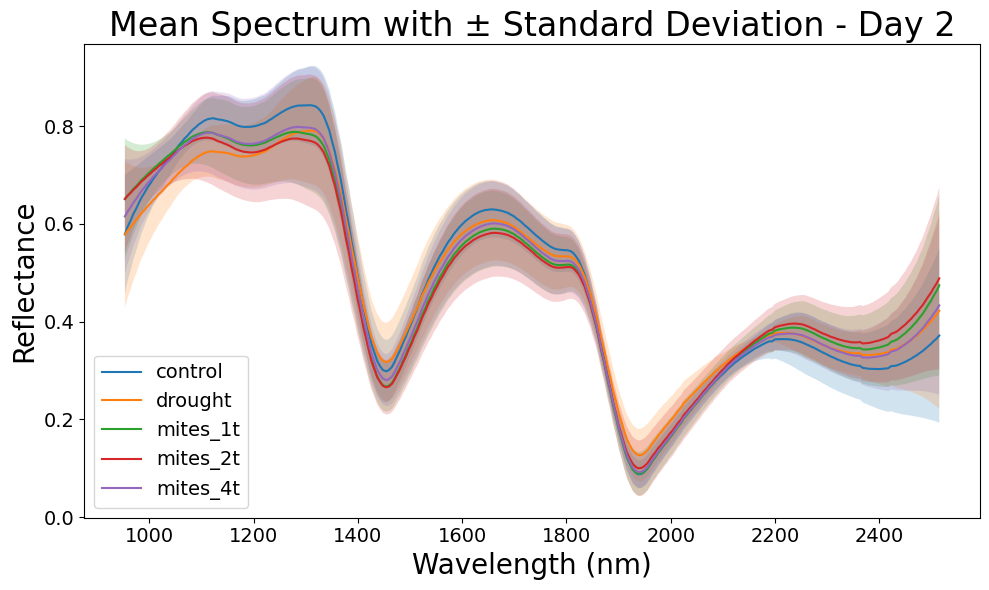

In [24]:
plot_mean_std(day2_mean, day2_std, day=2, cam="swir")

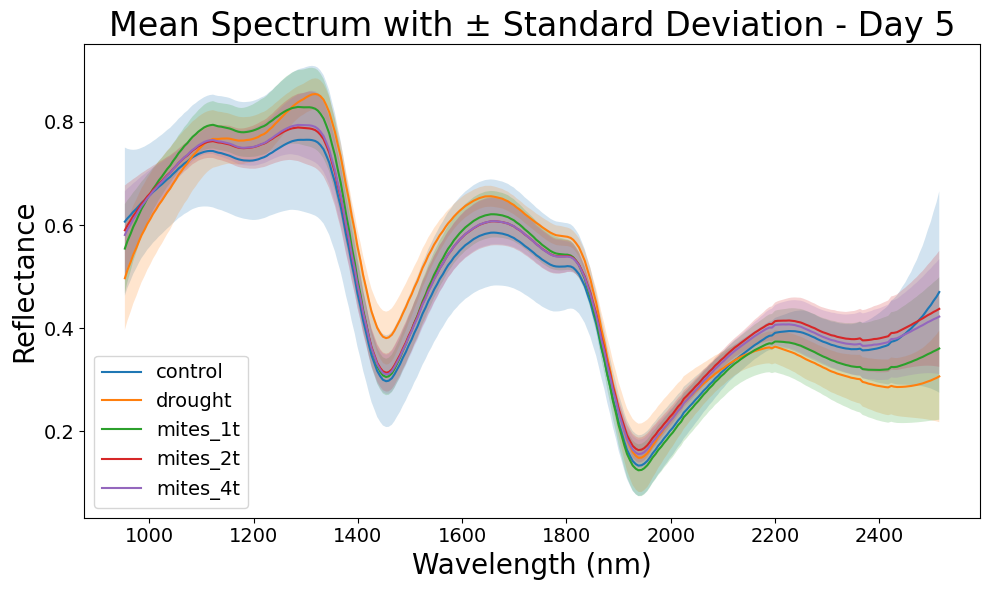

In [25]:
plot_mean_std(day5_mean, day5_std, day=5, cam="swir")

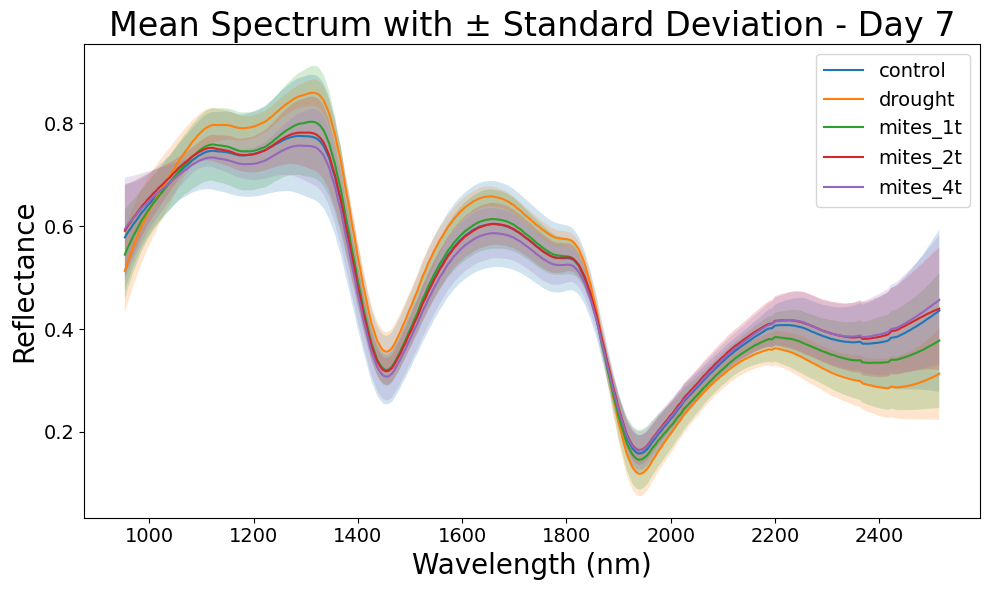

In [26]:
plot_mean_std(day7_mean, day7_std, day=7, cam="swir")


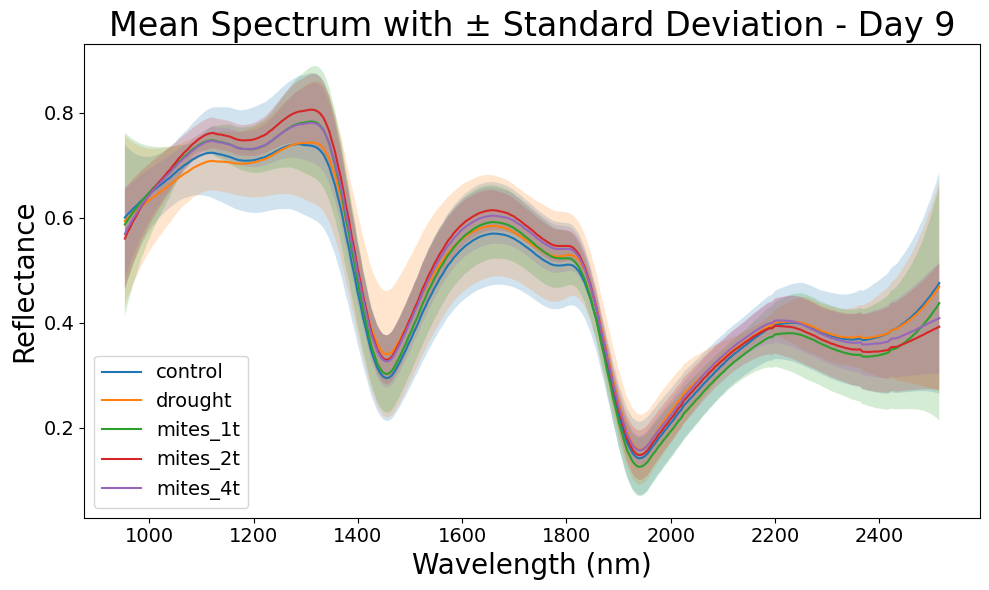

In [27]:
plot_mean_std(day9_mean, day9_std, day=9, cam="swir")


In [28]:
day2_mean.reset_index(inplace=True)
day5_mean.reset_index(inplace=True)
day7_mean.reset_index(inplace=True)
day9_mean.reset_index(inplace=True)


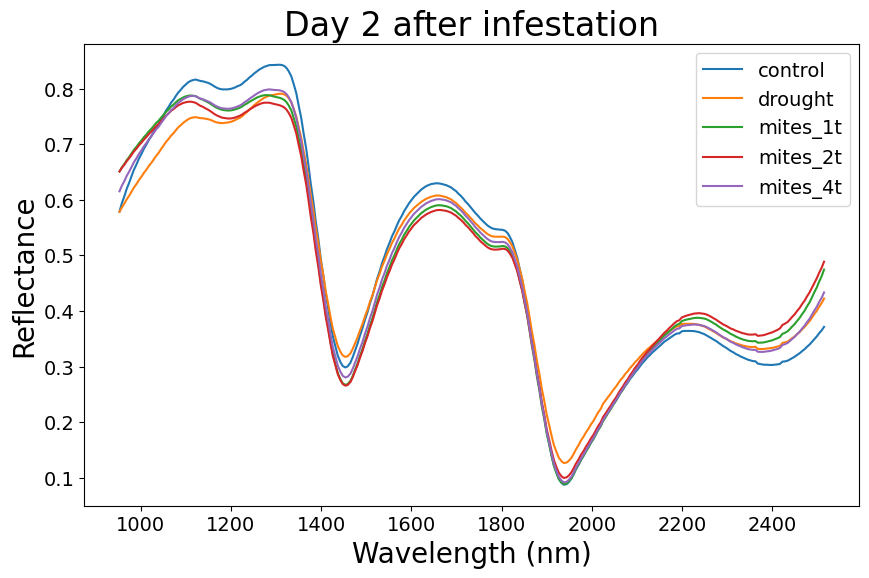

In [29]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day2_mean.columns if col not in ["class"]]
for ix, row in enumerate(day2_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day2_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 2 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/swir_day2.png", dpi=400)

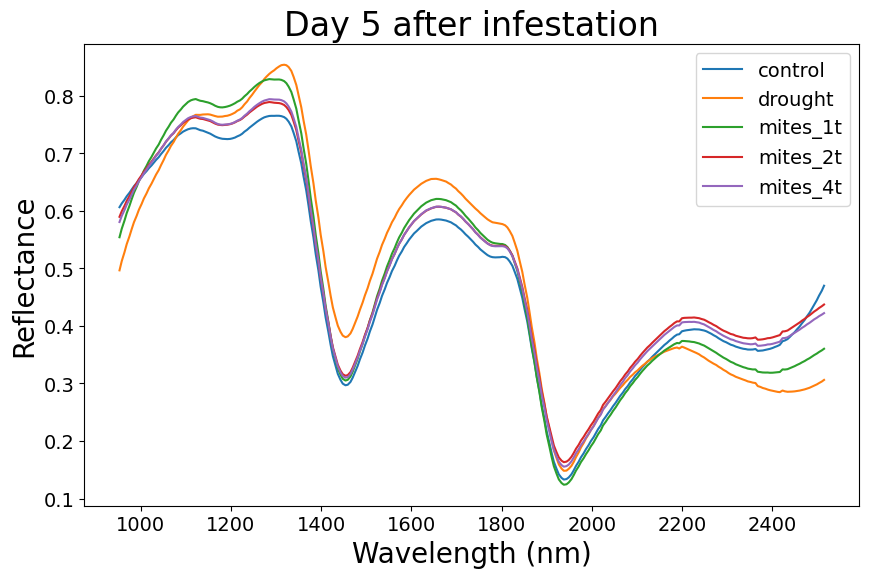

In [30]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day5_mean.columns if col not in ["class"]]
for ix, row in enumerate(day5_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day5_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 5 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/swir_day5.png", dpi=400)

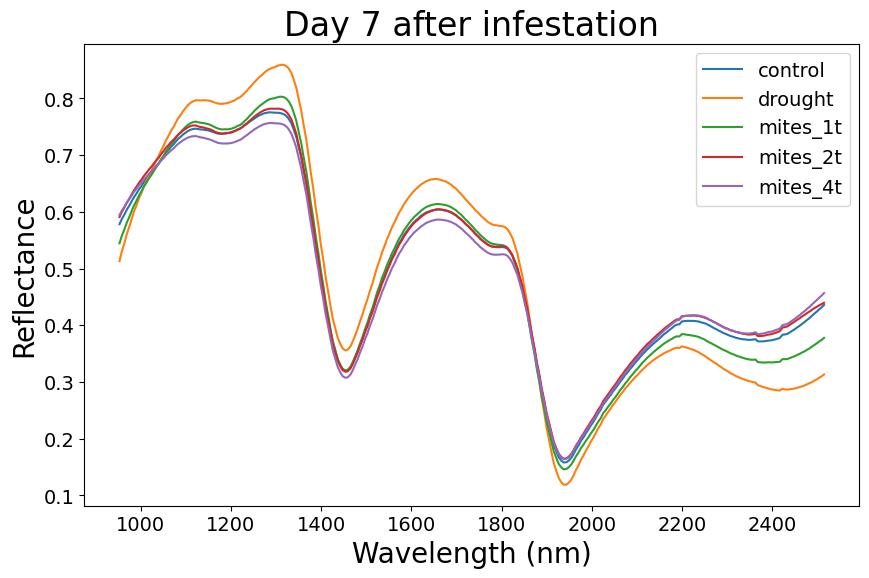

In [31]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day7_mean.columns if col not in ["class"]]
for ix, row in enumerate(day7_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day7_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 7 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/swir_day7.png", dpi=400)

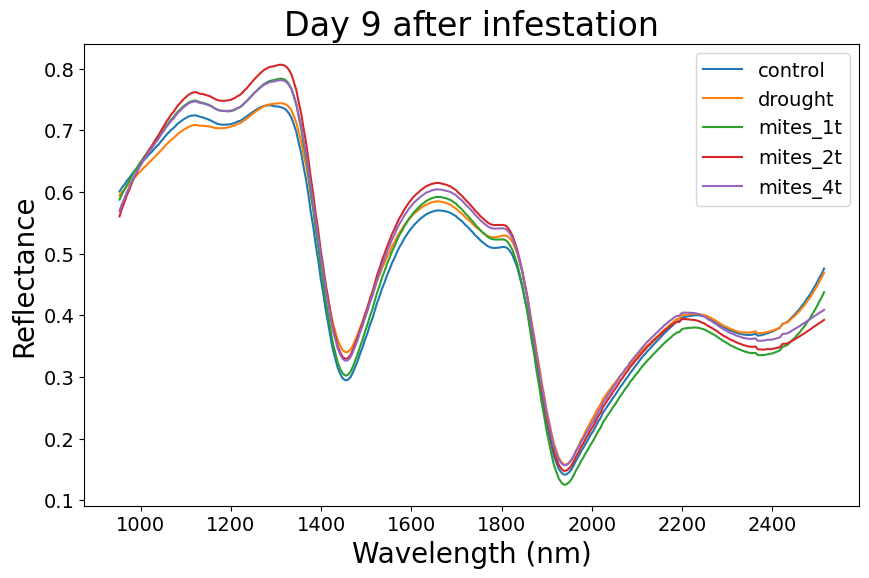

In [32]:
plt.figure(figsize=(10, 6))
feature_cols = [col for col in day9_mean.columns if col not in ["class"]]
for ix, row in enumerate(day9_mean[feature_cols].iterrows()):
  plt.plot(wavelengths, row[1], label=day9_mean.iloc[ix]["class"])
  plt.legend(fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("Day 9 after infestation", fontsize=24)
  plt.xlabel("Wavelength (nm)", fontsize=20)
  plt.ylabel("Reflectance", fontsize=20)

plt.savefig("/content/drive/MyDrive/Master/data/plots/swir_day9.png", dpi=400)